# Calculating Pearson Correlation Coefficient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv("pearson_corr_tumor.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
data_sub=data.iloc[:,2:4]

In [15]:
data_sub.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [16]:
data_sub.cov()

,radius_mean,texture_mean
radius_mean,12.418920,4.907582
texture_mean,4.907582,18.498909


We are trying to find the relationship between radius mean and texture mean columns in our data, lets take radius mean as X variable and texture mean as Y.

In [3]:
X = data["radius_mean"]
Y = data["texture_mean"]

Calculating the required statistics

In [27]:
x_mean = X.mean()
y_mean = Y.mean()
x_var = X.std()**2
y_var = Y.std()**2
N = X.shape[0]

569

In [20]:
x_mean, y_mean,x_var

(14.127291739894563, 19.28964850615117, 12.39709425935181)

For finding pearson correlation coefficient , first we need to calculate  the covariance and then divide it with the square root of individual variances.
So Covariance is

In [28]:
cov=np.sum((X-x_mean)*(Y-y_mean))/N

In [29]:
cov

4.898956640330368

Now we need to calculate the pearson correlation coeffcient .

In [30]:
Pearson_correlation_coeff = cov/(np.sqrt(x_var)*np.sqrt(y_var))

In [31]:
Pearson_correlation_coeff

0.3232128542125701

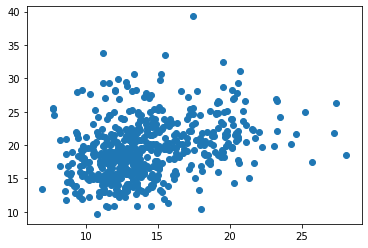

In [32]:
plt.scatter(X,Y)

The value of pearson correlation coeff is positive , it means that they have a directly proportional relationship but the value is not close to 1 it means the relationship is not that strong 
We can see that the scatter plot graph has points which are dispersed that is why the the pearson coeff value is quite low in magnitude.

** The other way for calculating pearson correlation coefficient **

In [34]:
cov_mat = data_sub.cov()

In [35]:
cov_mat

,radius_mean,texture_mean
radius_mean,12.418920,4.907582
texture_mean,4.907582,18.498909


In [36]:
pearson_coeff = cov/(np.sqrt(x_var)*np.sqrt(y_var))

In [37]:
pearson_coeff

0.3232128542125701

### Now Performing Pearson Correlation Test

Formula for Pearson Correlation Coefficient , lets say for 95% confidence interval having df = N-2 that is 569-2 =564 ,so t_critical = 1.984 for one tail so for two tail its going to be 1.98/2


In [46]:
t_critical = 1.984/2

In [47]:
t_calculated = np.sqrt((N-2)/1-(pearson_coeff**2))
t_calculated

23.809568107189005

As we have seen that t_calculated > t_critical it means that there is a significant difference between the two , in that case t_calculated iss going to lie in the alternative hypothesis region.